# **MLFlow - Part III**

In [1]:
from sklearn import datasets


df = datasets.fetch_california_housing(as_frame=True)
X = df.data
y = df.target

In [2]:
df.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


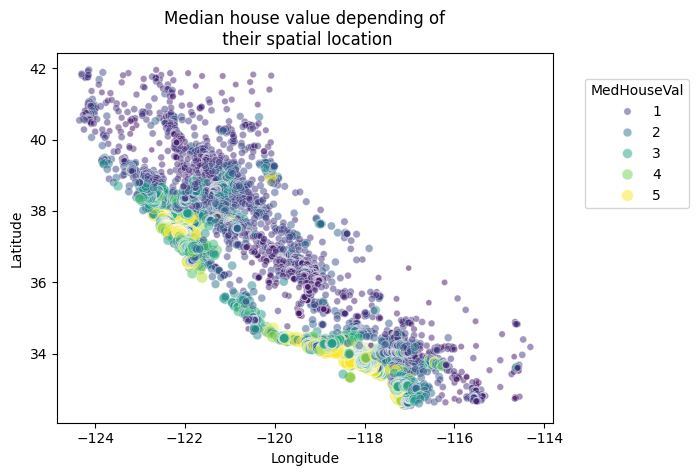

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=df.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

image_path = "graphic.png"

plt.savefig(image_path)

## Split the Data into Train and Test Sets

In [4]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [5]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)

(4128, 8)
(4128,)


## Train a Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##  Accuracy of the Model

- The regression line is the prediction.
- The dots are the actual values

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error


MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE*100)

MSE: 55.58915986952444


## Create a Run and log the model and metrics

In [10]:
import mlflow

mlflow.create_experiment("california_prediction")

'367802988705657672'

In [11]:
import mlflow

EXPERIMENT_NAME = "california_prediction"
RUN_NAME = "california_prediction"

MLFLOW_TRACKING_URI = "http://localhost:5000"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

experiment_id = experiment.experiment_id

with mlflow.start_run(
    experiment_id=experiment_id,
    run_name=RUN_NAME,
) as run:
    
    mlflow.log_metric("MSE", MSE)

    mlflow.log_artifact(image_path)

    mlflow.sklearn.log_model(model, "model")

## Register the model by coding (not interface)

In [12]:
run_id = run.info.run_id
run_id

'574111b72232431e835b8d36c280dbea'

In [13]:
MODEL_NAME = EXPERIMENT_NAME

model_path = f"runs:/{run_id}/model"

In [14]:
result = mlflow.register_model(model_path, MODEL_NAME)
print(f" Registered model version: {result.version}!")

Successfully registered model 'california_prediction'.
2024/03/10 19:22:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: california_prediction, version 1


 Registered model version: 1!


Created version '1' of model 'california_prediction'.


-------------